# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [21]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

#normalize the images
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
#reshape the images for the CNN
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
# extracting a subset of the data
x_train_subset=x_train[:1000]
y_train_subset=y_train[:1000]

model=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu',input_shape=x_train_subset[0].shape),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history=model.fit(x_train_subset,y_train_subset,batch_size=5,epochs=50,validation_data=(x_test,y_test),verbose=1)
train_loss,train_accuracy=model.evaluate(x_train_subset,y_train_subset)
test_loss,test_accuracy=model.evaluate(x_test,y_test)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.2259 - loss: 2.0974 - val_accuracy: 0.4955 - val_loss: 1.4935
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6171 - loss: 1.1432 - val_accuracy: 0.6670 - val_loss: 0.9661
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7329 - loss: 0.7764 - val_accuracy: 0.7231 - val_loss: 0.8491
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7879 - loss: 0.6218 - val_accuracy: 0.7656 - val_loss: 0.7781
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8816 - loss: 0.4208 - val_accuracy: 0.8183 - val_loss: 0.6286
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9163 - loss: 0.3422 - val_accuracy: 0.8228 - val_loss: 0.6320
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9358 - loss: 0.2384 - val_accuracy: 0.8391 - val_loss: 0.5773
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9390 - loss: 0.2256 - val_accu

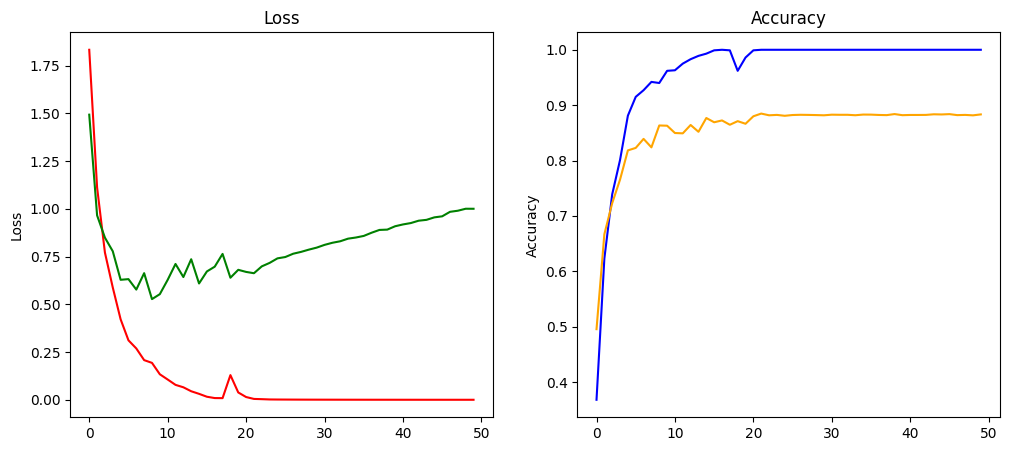

In [22]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, color='red')
plt.plot(val_loss,color='green')
plt.title('Loss')
plt.ylabel('Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, color='blue')
plt.plot(val_accuracy, color='orange')
plt.title('Accuracy')
plt.ylabel('Accuracy')

# Show the plots
plt.show()

# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [23]:
# Example
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [76]:
import random as rnd
import tensorflow as tf
t_x = []
t_y = []
sz = len(train_images) 
for i in range(20):
   idx = rnd.randint(0,sz-1)
   for c in range(10):
     while train_labels[idx] != c:
       idx = rnd.randint(0,sz-1)
     t_x += [np.ndarray.flatten(train_images[idx])]
     t_y += [train_labels[idx]]  

t_x = np.array(t_x, dtype=np.float32)/255.0
test_images=test_images.reshape(-1,784)
test_images.shape



(10000, 784)


## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


(60000, 784)
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 9.8530e-04 - loss: 0.1647 - val_accuracy: 0.0000e+00 - val_loss: 0.1513
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1226 - val_accuracy: 0.0000e+00 - val_loss: 0.1332
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1094 - val_accuracy: 0.0000e+00 - val_loss: 0.1313
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1135 - val_accuracy: 0.0000e+00 - val_loss: 0.1305
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1094 - val_accuracy: 0.0000e+00 - val_loss: 0.1303
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1136 - val_accuracy: 0.0000e+00 - val_loss: 0.1295
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.1095 - val_accuracy: 0.0000e+00 - val_loss: 0.1285
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

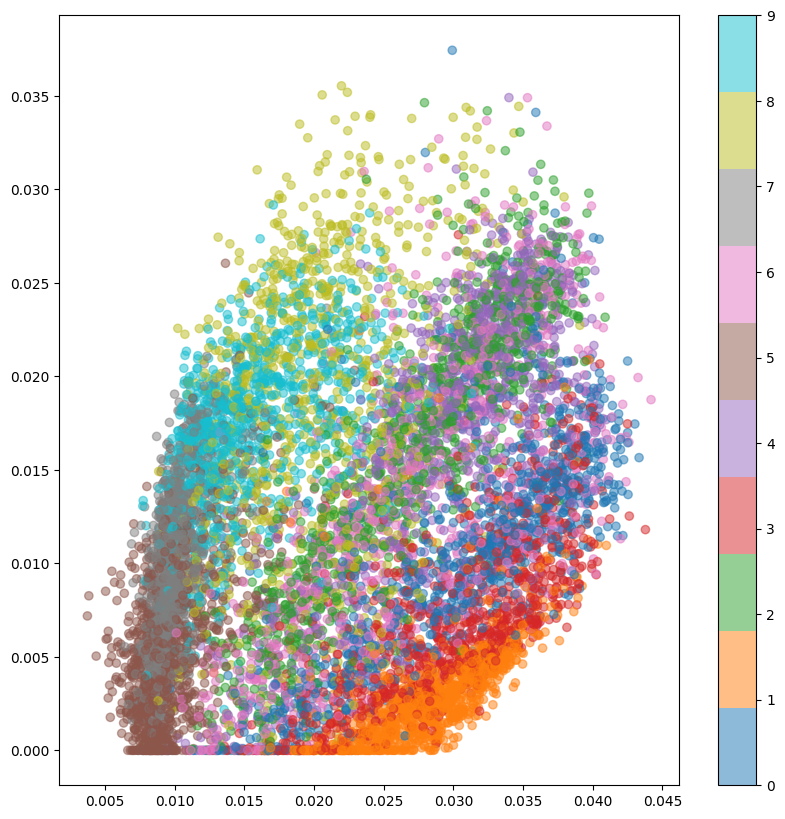

In [79]:
from tensorflow.keras import models,layers,datasets
print(x_train.shape)
autoencoder=models.Sequential([
    layers.InputLayer(shape=(784,)),
    layers.Dense(2,activation='relu'),
    layers.Dense(784,activation='relu')
])

autoencoder.compile(optimizer='adam',loss='mse', metrics=['accuracy'])
history=autoencoder.fit(t_x,t_x,batch_size=5, epochs=10, validation_split=0.2,verbose=1)

encoder=models.Sequential([
    layers.InputLayer(shape=(784,)),
    layers.Dense(2,activation='relu')
])
encoder.set_weights(autoencoder.layers[0].get_weights())

encoded_imgs=encoder.predict(test_images)

plt.figure(figsize=(10,10))
scatter=plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=test_labels, cmap='tab10',alpha=0.5)
plt.colorbar(scatter)
plt.show()


## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [ ]:
Write your code here

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [ ]:
Write your code here


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [ ]:
Write your code here